# Project : Mapping India Post: An Exploratory Analysis of Postal Infrastructure and Service Coverage

# Project Overview:

This project explores the structure, distribution, and service coverage of post offices across India using a dataset containing information about post office names, types, delivery capability, locations (districts, states, divisions, latitude/longitude), and administrative hierarchy.

The analysis was conducted at multiple levels:

### 1.State-level: 
Understanding the distribution of post offices across states and their proportional share.

### 2.Circle–Region–Division-level: 
Examining administrative hierarchies and regional coverage.

### 3.Office Type & Service Coverage: 
Investigating the prevalence of Branch Offices (BOs), Post Offices (POs), and Head Offices (HOs), and delivery vs non-delivery capabilities.

### 4.Geographic Patterns:
Mapping offices spatially to analyze coverage and distribution across India.

### 5.District-level Micro Analysis: 
Identifying top and bottom districts in terms of office count and delivery coverage.

### 6.Case Study: 
A focused analysis of Bankura district, West Bengal, including office types, delivery coverage, and geographic spread.

The project leverages Pandas for data manipulation and Matplotlib/Seaborn/Squarify for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.patheffects as pe
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataframe

In [2]:
mydf=pd.read_csv('india_pincodes.csv')

In [54]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165627 entries, 0 to 165626
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   circlename    165627 non-null  object
 1   regionname    165312 non-null  object
 2   divisionname  165627 non-null  object
 3   officename    165627 non-null  object
 4   pincode       165627 non-null  int64 
 5   officetype    165627 non-null  object
 6   delivery      165627 non-null  object
 7   district      164912 non-null  object
 8   statename     164912 non-null  object
 9   latitude      153620 non-null  object
 10  longitude     153625 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.9+ MB


## Number of Post Offices by State:

In [4]:
mydf.sample()

,circlename,regionname,divisionname,officename,pincode,officetype,delivery,district,statename,latitude,longitude
6172,Karnataka Circle,North Karnataka Region,Bagalkot Division,Rampur B.O,587314,BO,Non Delivery,BAGALKOT,KARNATAKA,16.5043269,75.2917442


In [5]:
state_counts=mydf.groupby('statename').size().sort_values(ascending=False).reset_index(name='post_offices_number')

In [6]:
state_counts

,statename,post_offices_number
0,UTTAR PRADESH,17968
1,MAHARASHTRA,13762
2,TAMIL NADU,11733
3,RAJASTHAN,11032
4,ANDHRA PRADESH,10681
5,MADHYA PRADESH,10272
6,KARNATAKA,9658
7,BIHAR,9309
8,ODISHA,8915
9,GUJARAT,8841


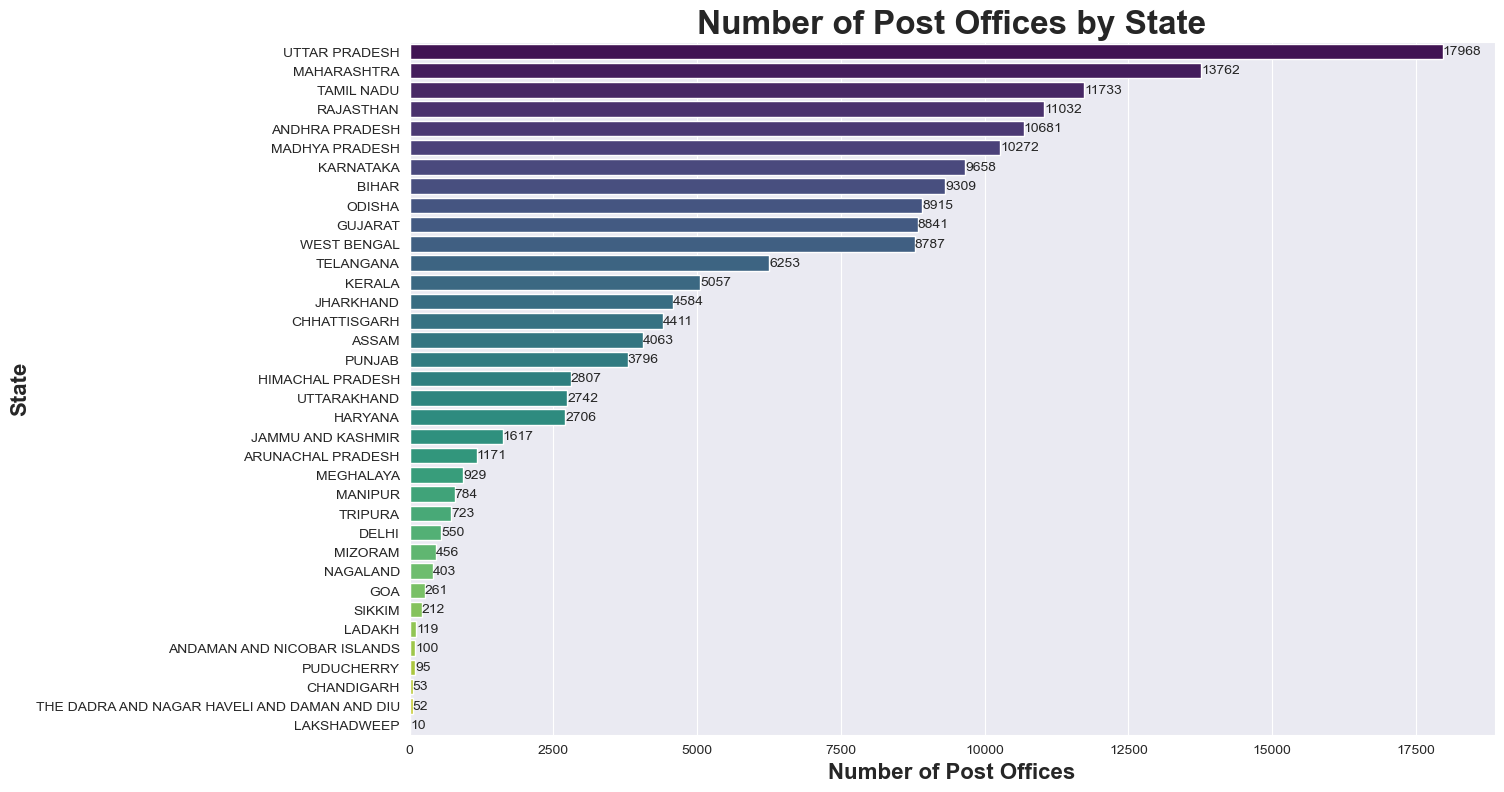

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,9))
ax=sns.barplot(data=state_counts,y='statename',x='post_offices_number',palette='viridis')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=10
    )
plt.title('Number of Post Offices by State',fontsize=24,fontweight='bold')
plt.xlabel('Number of Post Offices',fontsize=16,fontweight='semibold')
plt.ylabel('State',fontsize=16,fontweight='semibold')
plt.savefig('Number_of_post_offices_statewise.png')
plt.show()

## Insights:
- Uttar Pradesh dominates the postal network with the highest number of post offices, while smaller and highly urbanized regions such as Lakshadweep, Chandigarh, and Puducherry have significantly fewer offices, reflecting population size and rural coverage needs.

# Top vs Bottom States (Dominance View)

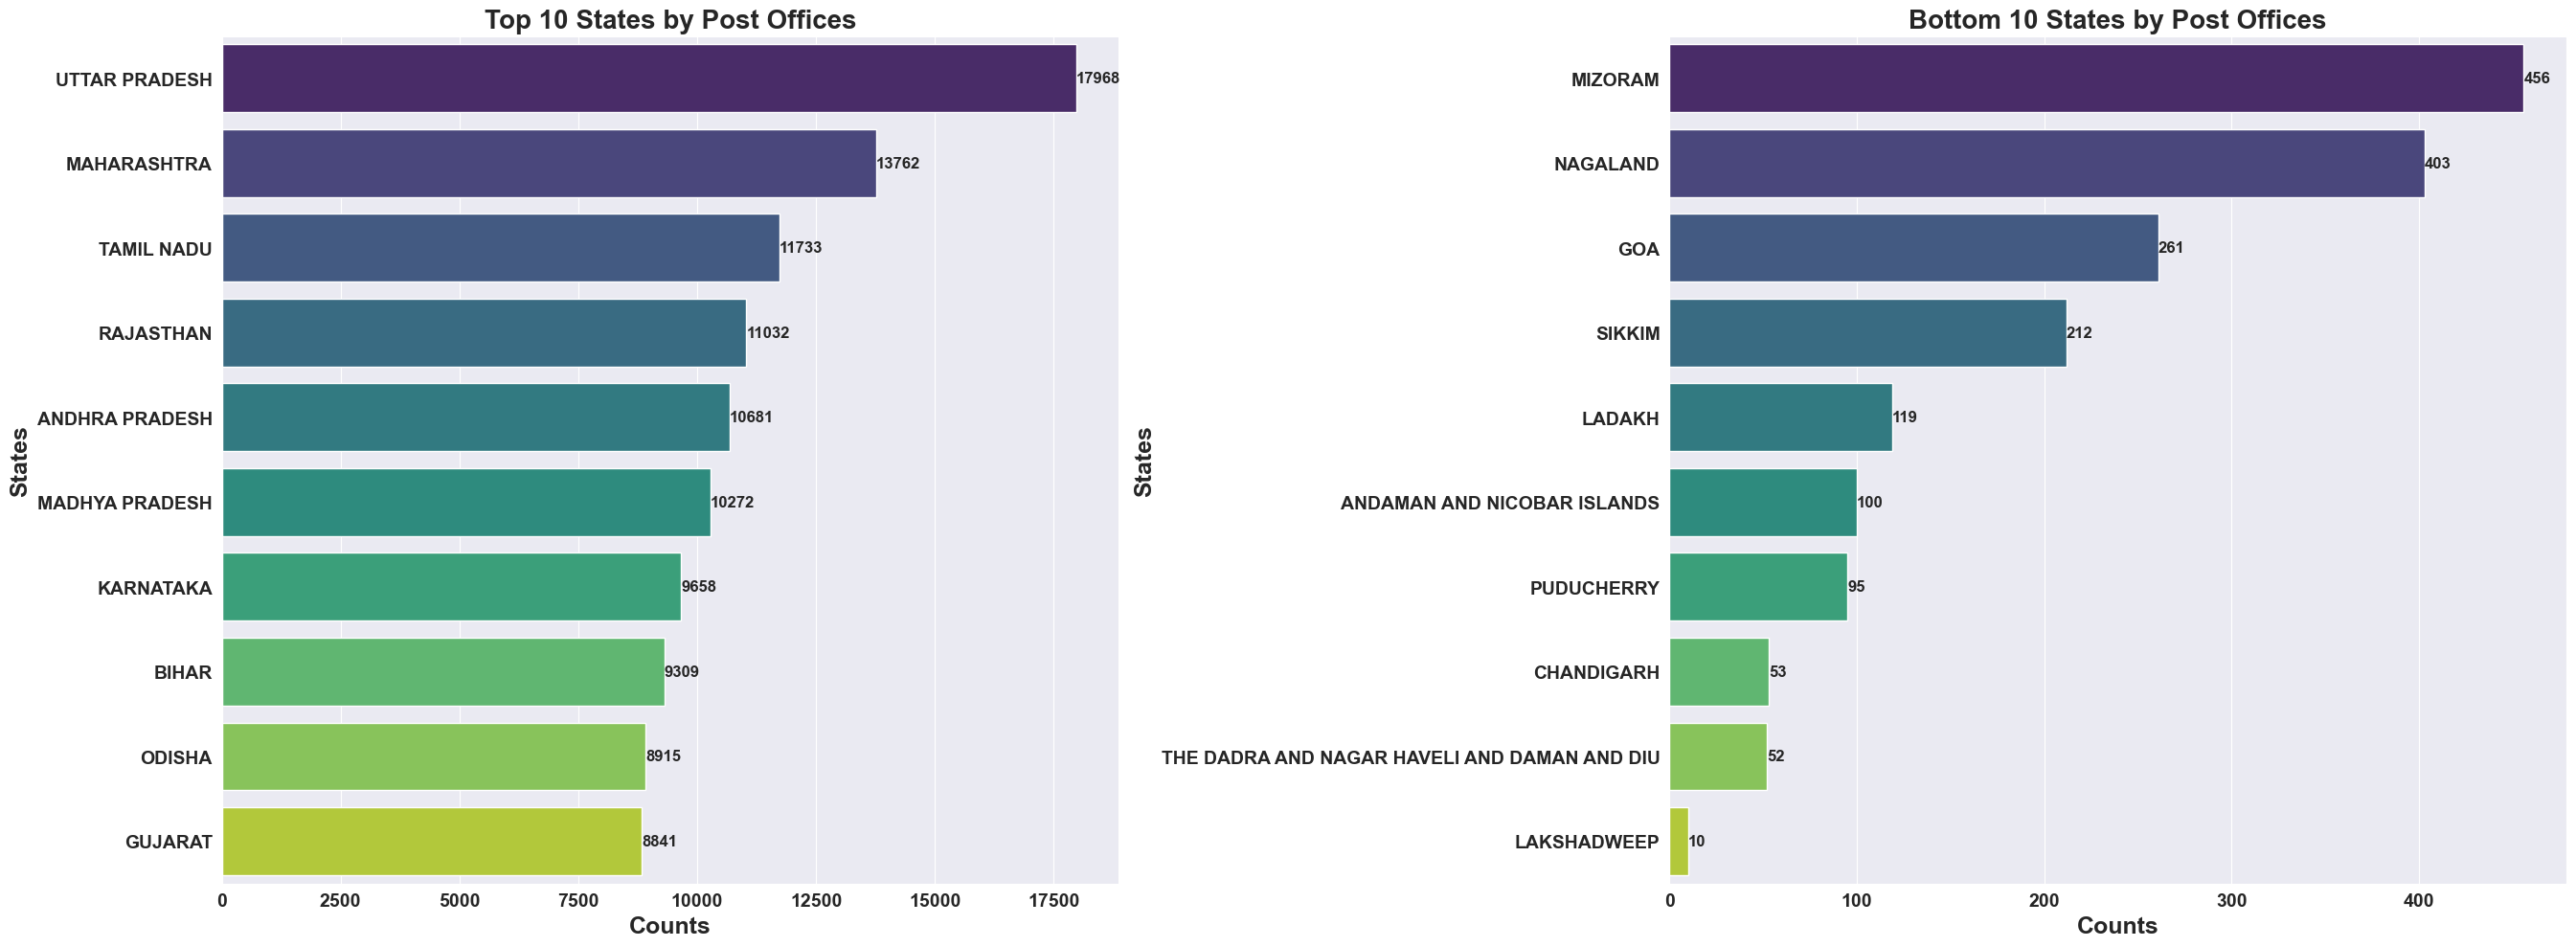

In [8]:
sns.set_style('darkgrid')
top_states=state_counts.head(10)
bottom_states=state_counts.tail(10)

fig,axes=plt.subplots(1,2,figsize=(27, 10))
plot1=sns.barplot(data= top_states,y='statename',x='post_offices_number',ax=axes[0],palette='viridis')
axes[0].set_title('Top 10 States by Post Offices',fontsize=20,fontweight='bold')
for p in plot1.patches:
    width = p.get_width()
    plot1.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=12,
        fontweight='semibold'
    )
plot2=sns.barplot(data=bottom_states,y='statename',x='post_offices_number',ax=axes[1],palette='viridis')
axes[1].set_title('Bottom 10 States by Post Offices',fontsize=20,fontweight='bold')
for p in plot2.patches:
    width = p.get_width()
    plot2.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=12,
        fontweight='semibold'
    )    
for ax in axes:
    ax.set_xlabel('Counts',fontsize=18,fontweight='semibold')
    ax.set_ylabel('States',fontsize=18,fontweight='semibold')
    plt.setp(ax.get_xticklabels(), fontweight='bold', fontsize=14)
    plt.setp(ax.get_yticklabels(), fontweight='bold', fontsize=14)
plt.tight_layout()    
plt.show()

## Insight:
- The postal network is highly concentrated in a few large states such as Uttar Pradesh, Maharashtra, and Tamil Nadu, while small states and Union Territories like Lakshadweep, Chandigarh, and Puducherry operate with a minimal number of post offices due to limited geographic size and population.

## State Share as Percentage of Total (Normalization)

In [9]:
total_post_offices=state_counts['post_offices_number'].sum()

In [10]:
total_post_offices

np.int64(164912)

In [11]:
state_counts['percentage']=(state_counts['post_offices_number'] /total_post_offices)*100

In [12]:
state_counts

,statename,post_offices_number,percentage
0,UTTAR PRADESH,17968,10.895508
1,MAHARASHTRA,13762,8.345057
2,TAMIL NADU,11733,7.114704
3,RAJASTHAN,11032,6.689628
4,ANDHRA PRADESH,10681,6.476788
5,MADHYA PRADESH,10272,6.228777
6,KARNATAKA,9658,5.856457
7,BIHAR,9309,5.644829
8,ODISHA,8915,5.405913
9,GUJARAT,8841,5.361041


In [13]:
! pip install squarify

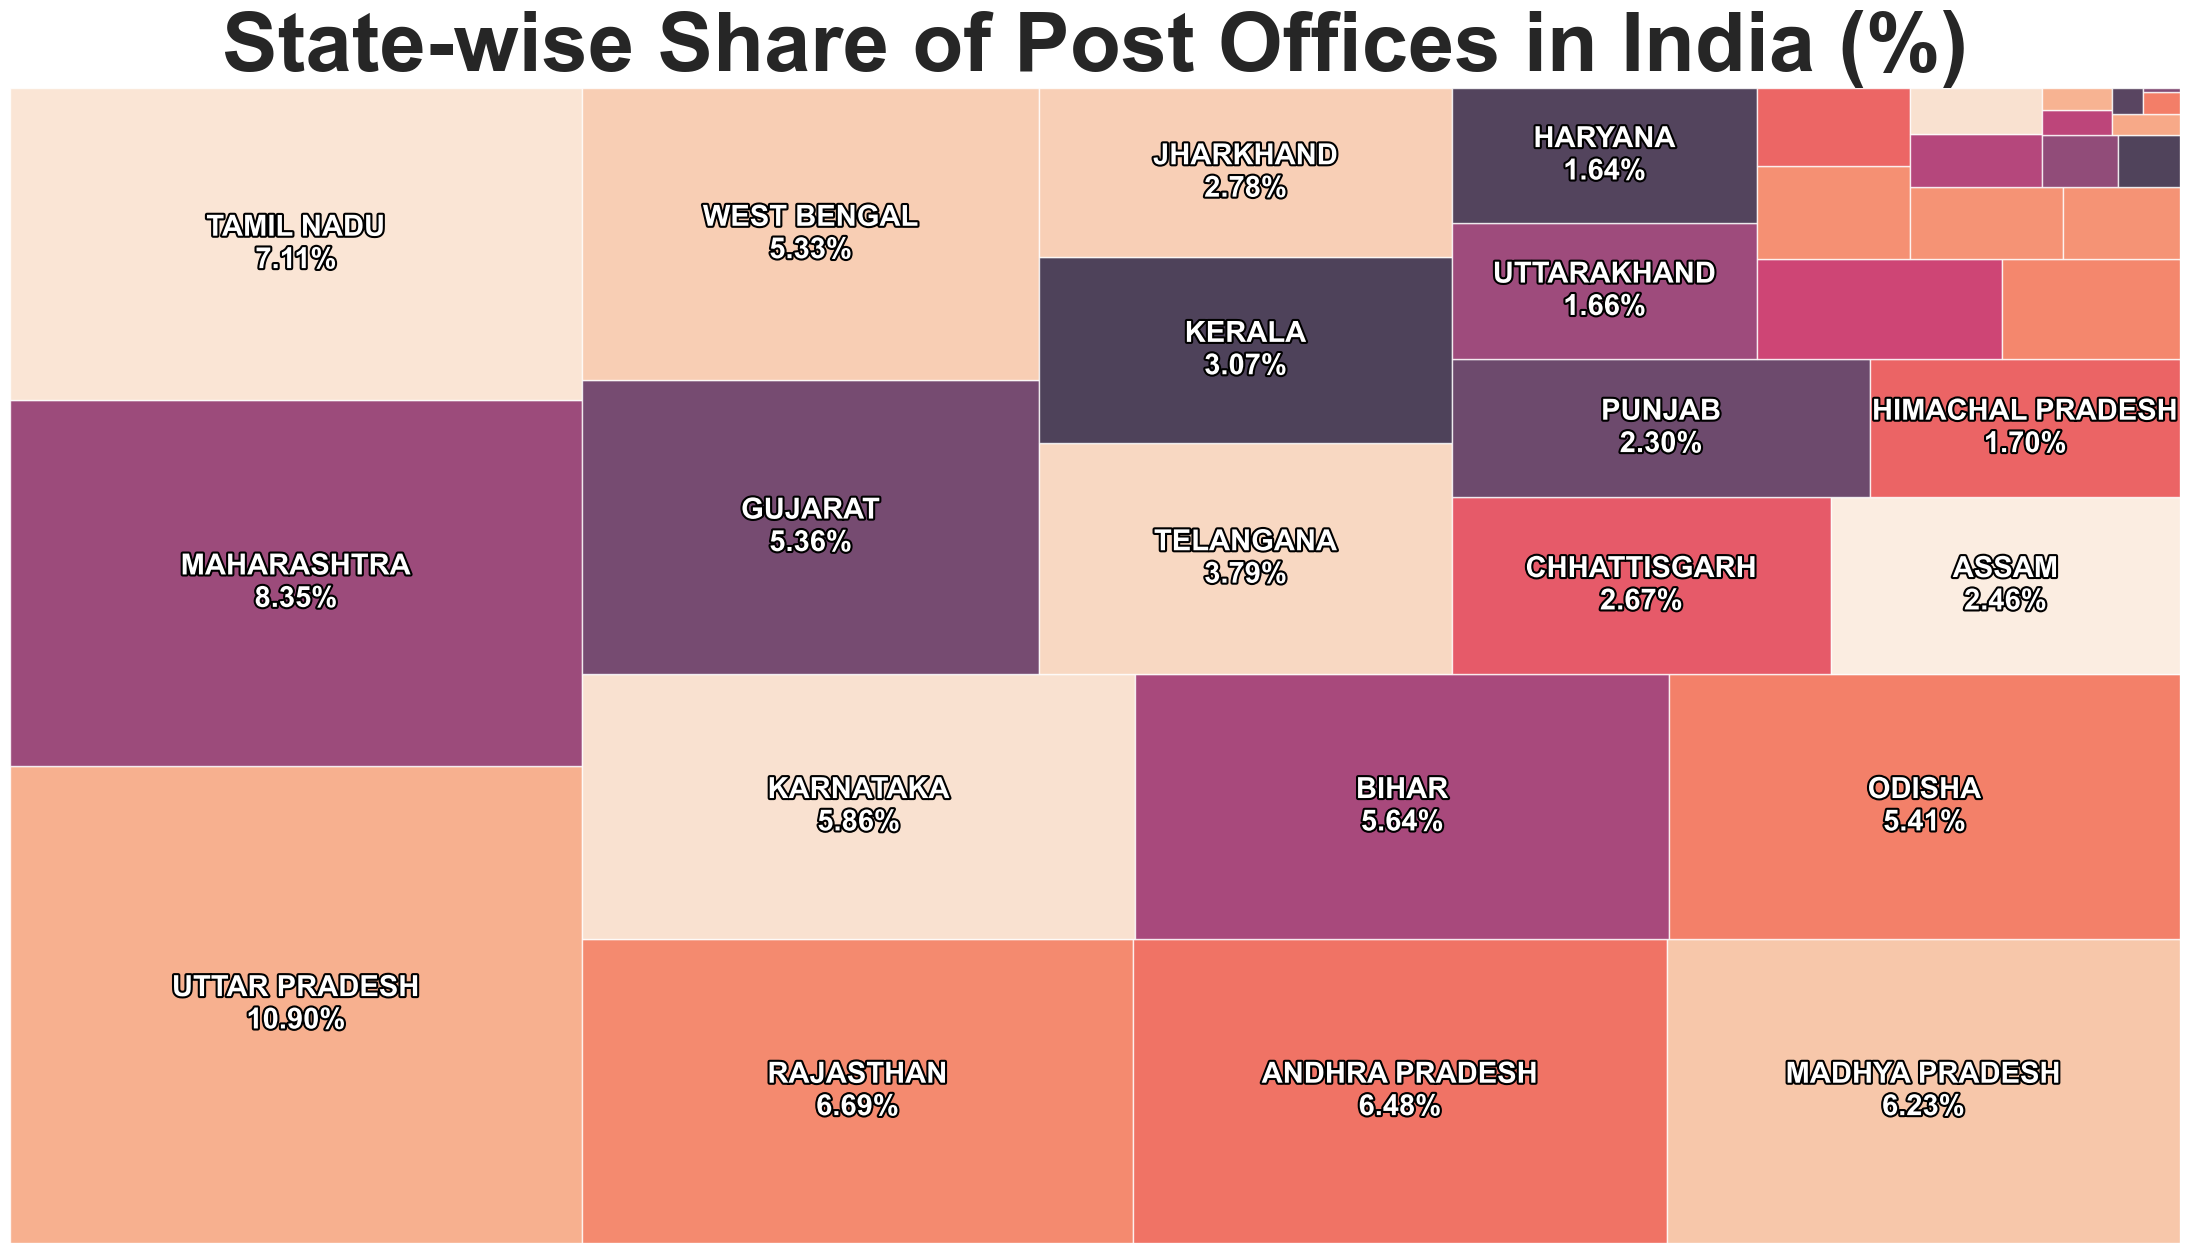

In [14]:
plt.figure(figsize=(28, 15))
labels = [
    f"{row.statename}\n{row.percentage:.2f}%"
    if row.percentage >= 1.0 else "" 
    for _, row in state_counts.iterrows()
]
squarify.plot(
    sizes=state_counts['percentage'],
    label=labels ,
    alpha=0.8,
    text_kwargs={
        'fontsize': 21,
        'fontweight': 'bold',
        'color': 'white',
        'path_effects': [pe.withStroke(linewidth=3, foreground='black')]
    }
)

plt.title('State-wise Share of Post Offices in India (%)',
          fontsize=60, fontweight='bold')
plt.axis('off')
plt.show()


## Insight:
A small group of large states accounts for a disproportionately high share of India’s post offices, with Uttar Pradesh alone contributing nearly 11% of the total postal infrastructure.

# Circle–Region–Division Hierarchy

In [15]:
mydf.sample()

,circlename,regionname,divisionname,officename,pincode,officetype,delivery,district,statename,latitude,longitude
90924,Tamilnadu Circle,Central Region Trichirapalli,Vriddhachalam Division,Arur B.O,606402,BO,Delivery,KALLAKURICHI,TAMIL NADU,11.88,78.95


In [16]:
mydf['circlename'] = mydf['circlename'].str.strip()
mydf['regionname'] = mydf['regionname'].str.strip()


In [17]:
divisions_per_region=mydf.groupby(['circlename','regionname'])['divisionname'].nunique().reset_index(name='divisioncount')

In [18]:
divisions_per_region

,circlename,regionname,divisioncount
0,APS CIRCLE,EASTERN COMMAND,1
1,APS CIRCLE,WESTERN COMMAND,1
2,Andhra Pradesh Circle,Kurnool Region,8
3,Andhra Pradesh Circle,Vijayawada Region,13
4,Andhra Pradesh Circle,Visakhapatnam Region,8
...,...,...,...
60,Uttarakhand Circle,DivReportingCircle,7
61,West Bengal Circle,DivReportingCircle,2
62,West Bengal Circle,Kolkata Region,12
63,West Bengal Circle,North Bengal Region,6


In [19]:
pivot_divisions = divisions_per_region.pivot_table(
    index='circlename',
    columns='regionname',
    values='divisioncount',
    fill_value=0
    
)

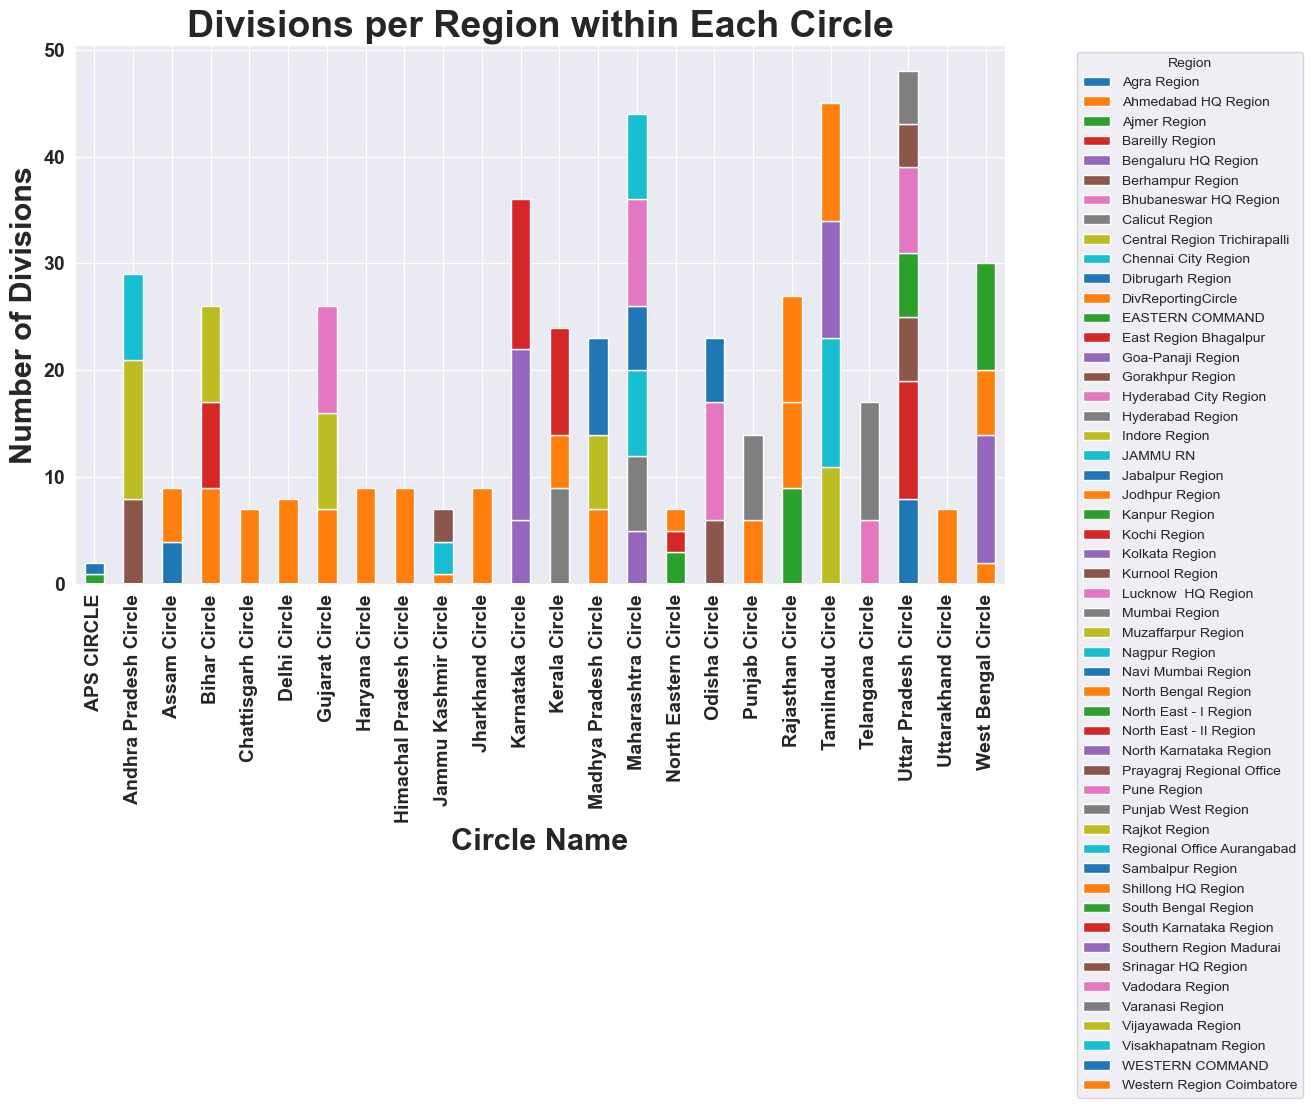

In [20]:
sns.set_style('darkgrid')
pivot_divisions.plot(kind='bar',stacked=True,figsize=(12,7))
plt.title('Divisions per Region within Each Circle', fontsize=27, fontweight='bold')
plt.xlabel('Circle Name', fontsize=22, fontweight='semibold')
plt.ylabel('Number of Divisions', fontsize=22, fontweight='semibold')
plt.legend(title='Region', bbox_to_anchor=(1.07, 1), loc='upper left')

plt.setp(plt.gca().get_xticklabels(),fontsize=14,fontweight='bold')
plt.setp(plt.gca().get_yticklabels(),fontsize=14,fontweight='bold')

plt.show()


## Insights:
- The administrative structure of India Post varies significantly across circles operating through 52 well-defined regions.The distribution is represented properly in the above stacked bar visualization. 

## Number of Offices per Circle

In [21]:
offices_per_circle=mydf.groupby(['circlename']).size().reset_index(name='officecounts').sort_values(by='officecounts',ascending=False)

In [22]:
offices_per_circle

,circlename,officecounts
21,Uttar Pradesh Circle,17997
14,Maharashtra Circle,14073
19,Tamilnadu Circle,11839
18,Rajasthan Circle,11053
1,Andhra Pradesh Circle,10686
13,Madhya Pradesh Circle,10292
11,Karnataka Circle,9670
3,Bihar Circle,9369
23,West Bengal Circle,9109
16,Odisha Circle,8920


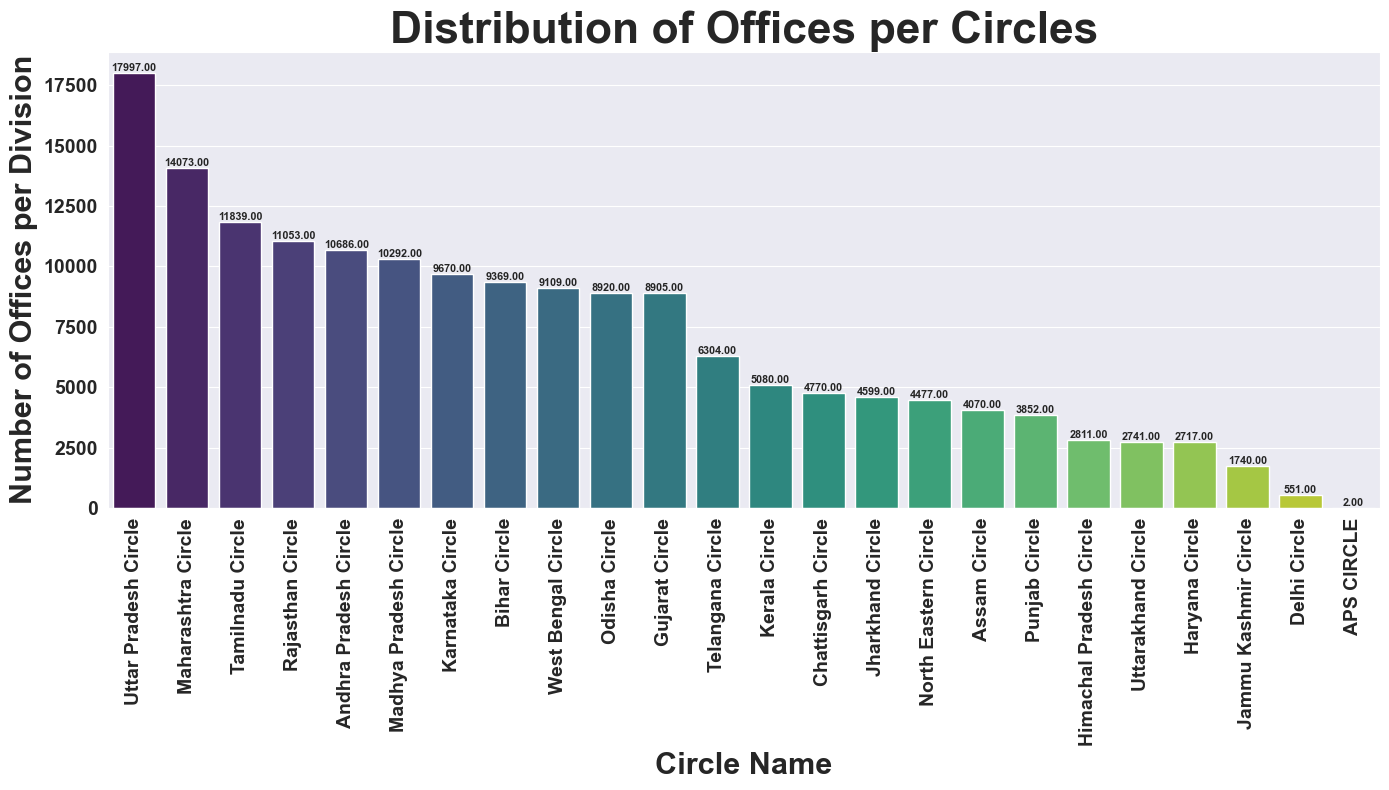

In [23]:
plt.figure(figsize=(14, 8))
sns.set_style('darkgrid')
ax=sns.barplot(
    data=offices_per_circle,
    x='circlename',
    y='officecounts',
    palette='viridis'
)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x()+p.get_width()/2., height),
                ha='center',
                va='bottom',
                fontsize=7.8,fontweight='semibold'        
    )
plt.xticks( rotation=90,fontweight='bold',fontsize=14)
plt.yticks(fontweight='bold',fontsize=14)
plt.xlabel('Circle Name', fontsize=22, fontweight='bold')
plt.ylabel('Number of Offices per Division', fontsize=22, fontweight='bold')
plt.title('Distribution of Offices per Circles',
          fontsize=32, fontweight='bold')

plt.tight_layout()
plt.show()


## Insight:
- Uttar Pradesh Circle has the largest postal footprint among all circles, while specialized or urban-focused circles such as APS Circle and Delhi Circle manage a significantly smaller number of offices.

# Office Type & Service Coverage

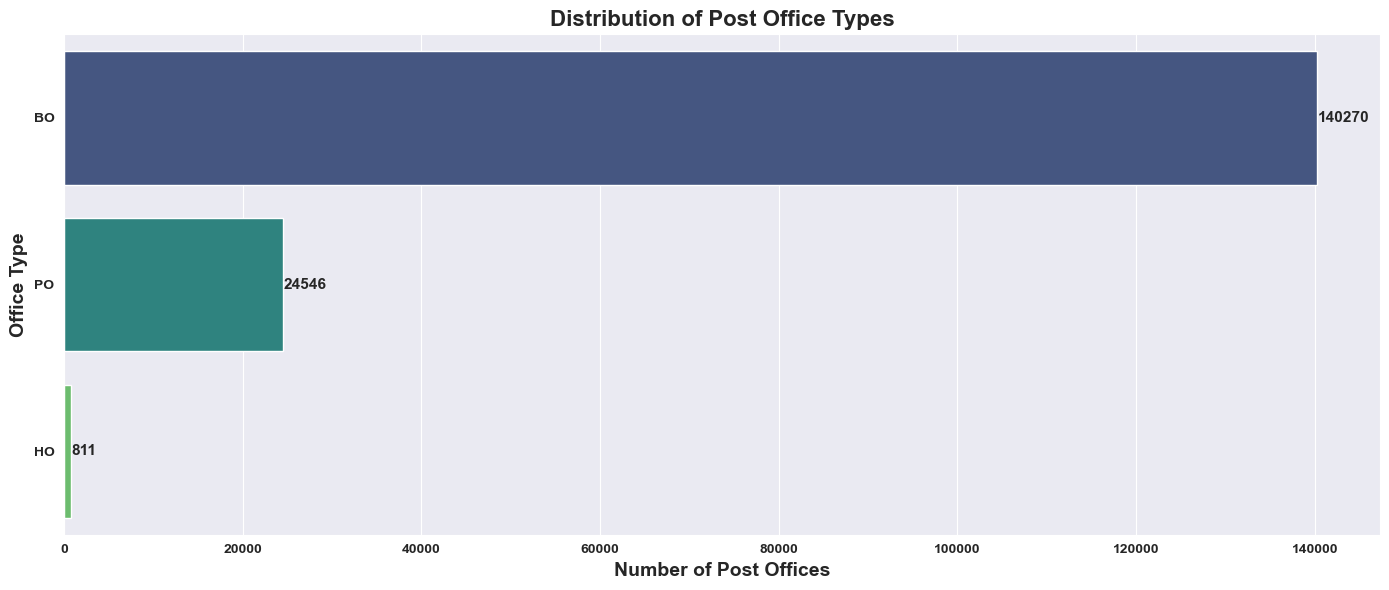

In [24]:
plt.figure(figsize=(14, 6))

office_type_counts = mydf['officetype'].value_counts().reset_index()
office_type_counts.columns = ['Office Type', 'Count']

ax=sns.barplot(
    data=office_type_counts,
    y='Office Type',
    x='Count',
    palette='viridis'
)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{width:.0f}',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=11.1,
        fontweight='semibold'
    )    
plt.xlabel('Number of Post Offices', fontsize=14, fontweight='bold')
plt.ylabel('Office Type', fontsize=14, fontweight='bold')
plt.title('Distribution of Post Office Types',
          fontsize=16, fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


## Insight:
- Branch Offices (BOs) overwhelmingly dominate the postal network, indicating a strong focus on rural and last-mile connectivity, while Head Offices (HOs) form only a small administrative core.

# Office Type Distribution Across States

In [25]:
state_office_type=mydf.groupby(['statename','officetype']).size().reset_index(name='count')
pivot_state_office_type=state_office_type.pivot(
    index='statename',
    columns='officetype',
    values='count'
).fillna(0)

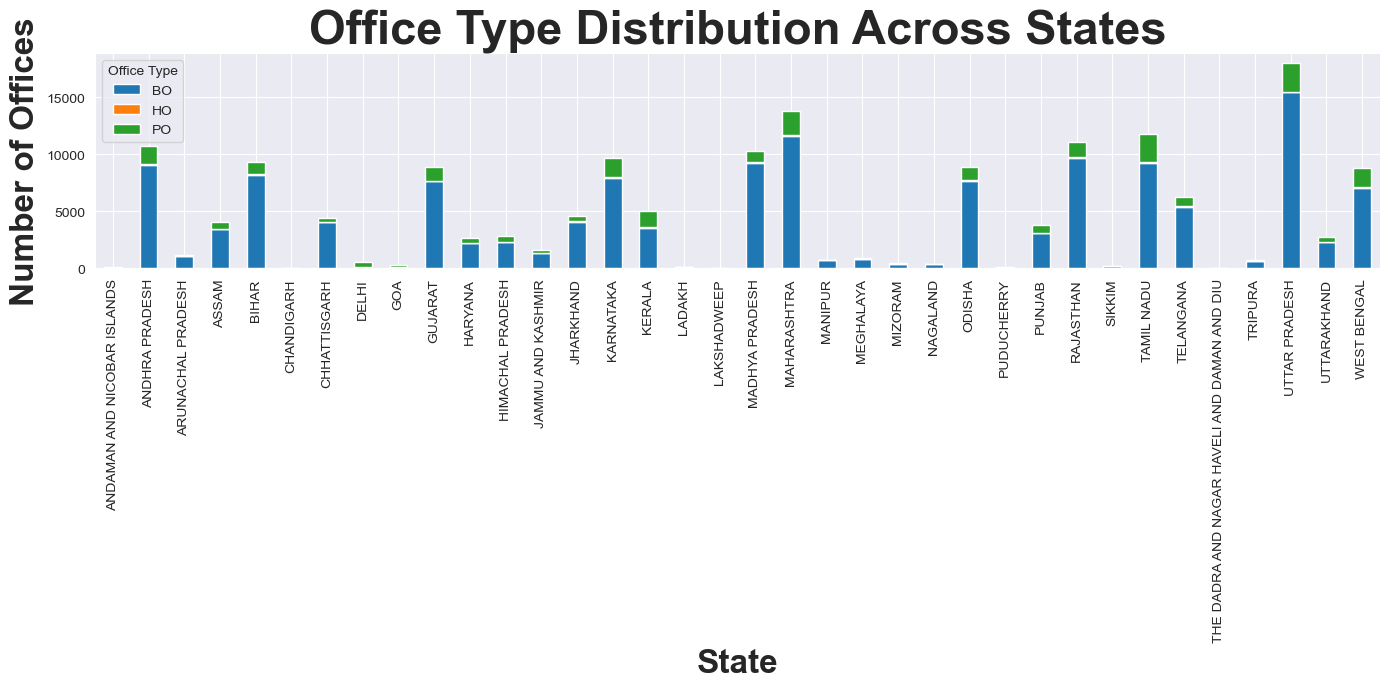

In [26]:
pivot_state_office_type.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7)
)
plt.title('Office Type Distribution Across States', fontsize=34, fontweight='bold')
plt.xlabel('State',fontsize=24, fontweight='bold')
plt.ylabel('Number of Offices',fontsize=24, fontweight='bold')
plt.legend(title='Office Type')
plt.tight_layout()
plt.show()

## Heatmap: State × Office Type Intensity

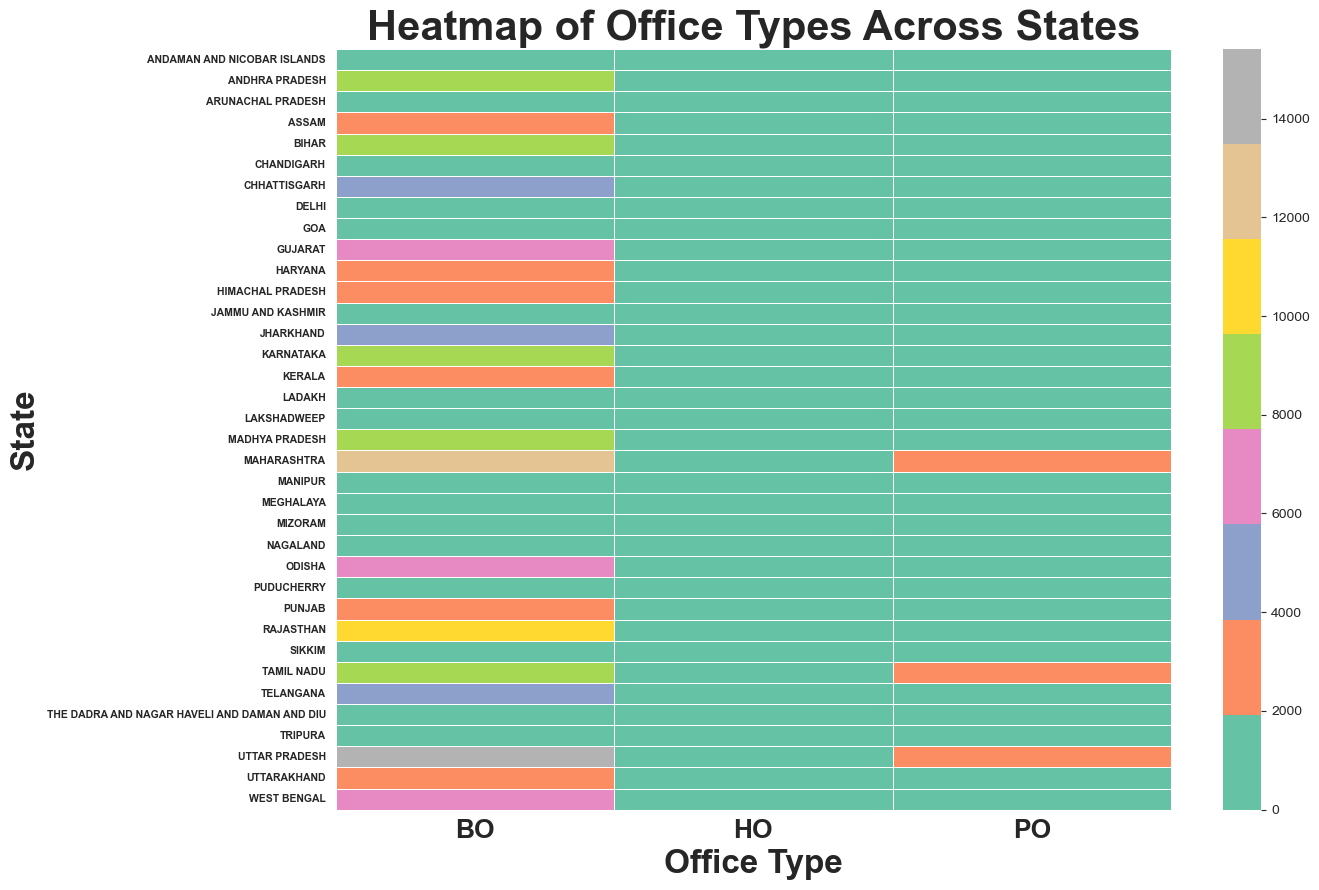

In [27]:
plt.figure(figsize=(14,9))
sns.heatmap(pivot_state_office_type,cmap='Set2',
    linewidths=0.5)
plt.title('Heatmap of Office Types Across States', fontsize=30, fontweight='bold')
plt.xlabel('Office Type', fontsize=24, fontweight='semibold')
plt.ylabel('State', fontsize=24, fontweight='semibold')
plt.xticks(fontsize=19, fontweight='semibold')
plt.yticks(fontsize=7.5, fontweight='semibold')
plt.tight_layout()
plt.show()

## Insight:
- Across all states, Branch Offices (BOs) form the backbone of the postal system, while higher concentrations of Post Offices (POs) and Head Offices (HOs) are observed in more urbanized and administratively significant states.

## Delivery vs Non-Delivery Offices (Overall)

In [28]:
delivery_counts=mydf['delivery'].value_counts().reset_index(name='counts')
delivery_counts

,delivery,counts
0,Delivery,157901
1,Non Delivery,7726


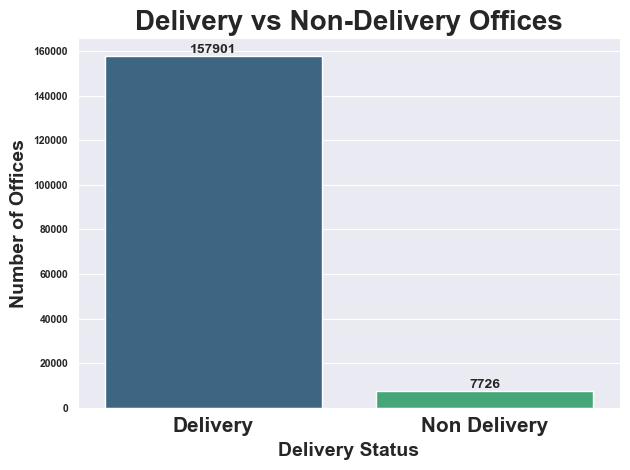

In [29]:

ax=sns.barplot(data=delivery_counts,x='delivery',y='counts',palette='viridis')
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.0f}',
               (p.get_x()+p.get_width()/2.,height),
               ha='center',
               va='bottom',
               fontsize=10,fontweight='semibold'
)
plt.title('Delivery vs Non-Delivery Offices', fontsize=20, fontweight='bold')
plt.xlabel('Delivery Status',fontsize=14, fontweight='semibold')
plt.ylabel('Number of Offices',fontsize=14, fontweight='semibold')
plt.xticks(fontsize=15, fontweight='semibold')
plt.yticks(fontsize=7.5, fontweight='semibold')
plt.tight_layout()
plt.show()

## Insight:
- The vast majority of post offices provide delivery services, highlighting India Post’s strong emphasis on last-mile service coverage across the country.

## Delivery Coverage by State (Stacked Bar)

In [30]:
delivery_state=mydf.groupby(['statename','delivery']).size().reset_index(name='count')
pivot_delivery_state=delivery_state.pivot(
    index='statename',
    columns='delivery',
    values='count'
).fillna(0)

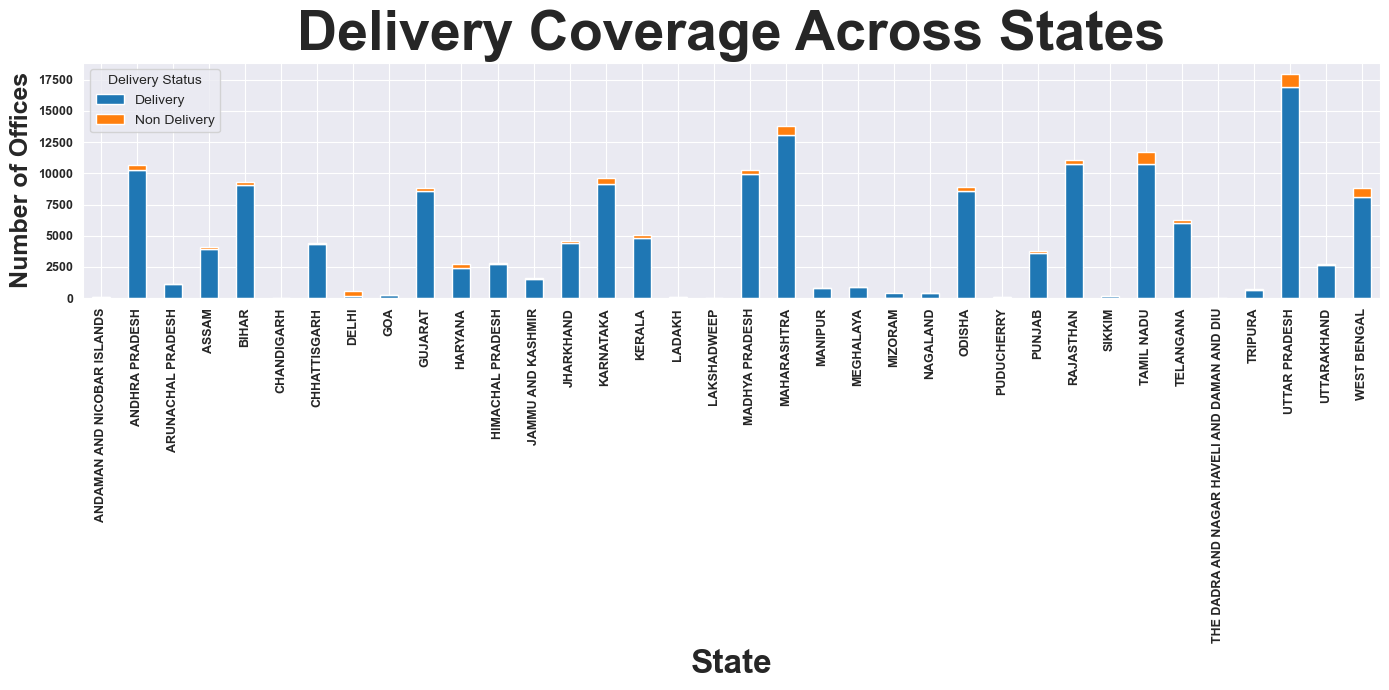

In [31]:
pivot_delivery_state.plot(kind='bar',stacked=True,figsize=(14,7))
plt.title('Delivery Coverage Across States', fontsize=40, fontweight='bold')
plt.xlabel('State',fontsize=24, fontweight='semibold')
plt.ylabel('Number of Offices',fontsize=18, fontweight='semibold')
plt.xticks(fontsize=9, fontweight='semibold')
plt.yticks(fontsize=9, fontweight='semibold')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

## Normalized Delivery Penetration by State

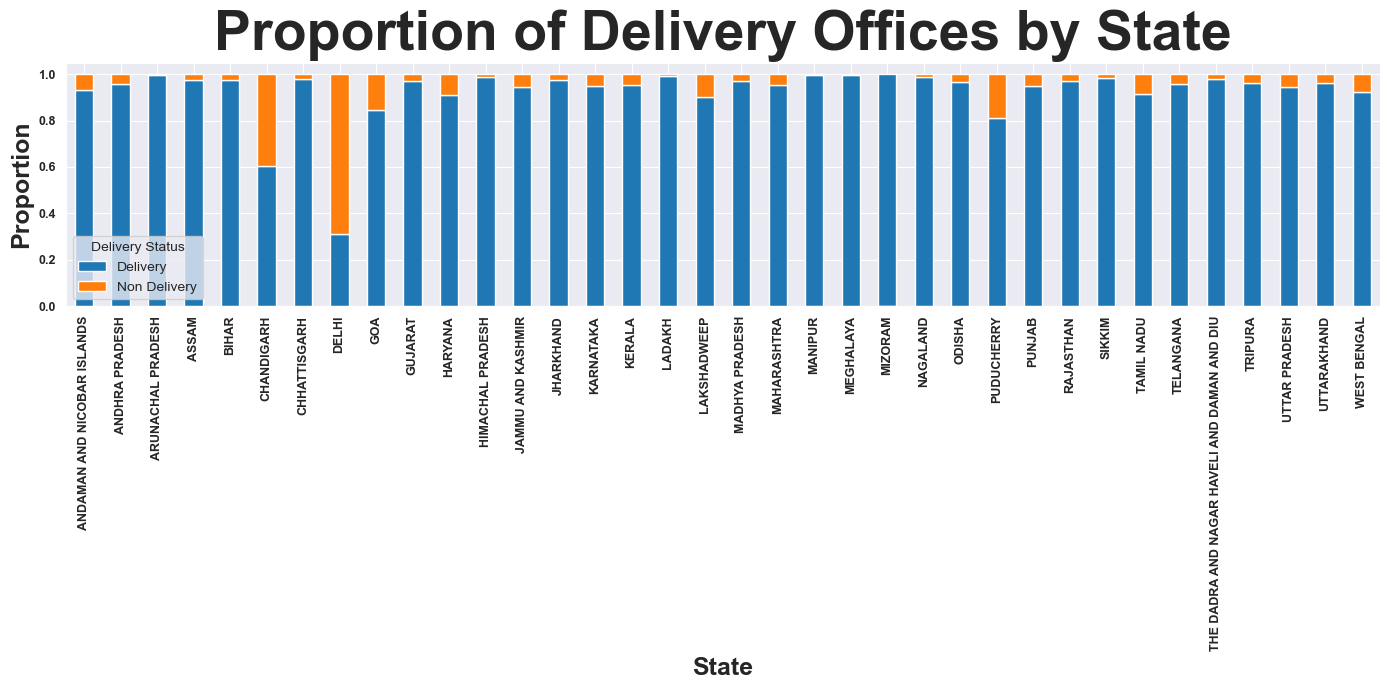

In [32]:
pivot_delivery_state_norm = pivot_delivery_state.div(
    pivot_delivery_state.sum(axis=1),
    axis=0
)

pivot_delivery_state_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7)
)

plt.title('Proportion of Delivery Offices by State', fontsize=40, fontweight='bold')
plt.xlabel('State',fontsize=18, fontweight='semibold')
plt.ylabel('Proportion',fontsize=18, fontweight='semibold')
plt.xticks(fontsize=9, fontweight='semibold')
plt.yticks(fontsize=9, fontweight='semibold')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


## Insight:
- Most states exhibit high delivery coverage, though urban regions such as Delhi and Chandigarh show a relatively larger share of non-delivery offices due to administrative and specialized service functions.

## District-Level Delivery Gaps

In [33]:
mydf.sample()

,circlename,regionname,divisionname,officename,pincode,officetype,delivery,district,statename,latitude,longitude
67601,Andhra Pradesh Circle,Kurnool Region,Nandyal Division,Parnapalle B.O,518523,BO,Delivery,Nandyal,ANDHRA PRADESH,NaN,NaN


In [34]:
district_delivery=mydf.groupby(['district','delivery']).size().reset_index(name='count')
pivot_district_delivery=district_delivery.pivot(
    index='district',
    columns='delivery',
    values='count'
).fillna(0)
pivot_district_delivery['delivery_ratio']=(
    pivot_district_delivery['Delivery'] /
    pivot_district_delivery.sum(axis=1)
)
most_underserved_dist=pivot_district_delivery.sort_values('delivery_ratio').head(10)

In [35]:
most_underserved_dist

delivery,Delivery,Non Delivery,delivery_ratio
district,,,
South East,1.0,34.0,0.028571
EAST,3.0,20.0,0.130435
NORTH EAST,4.0,17.0,0.190476
SHAHDARA,6.0,22.0,0.214286
NEW DELHI,18.0,66.0,0.214286
CENTRAL,7.0,25.0,0.218750
MUMBAI,33.0,78.0,0.297297
WEST,28.0,66.0,0.297872
SOUTH,23.0,49.0,0.319444


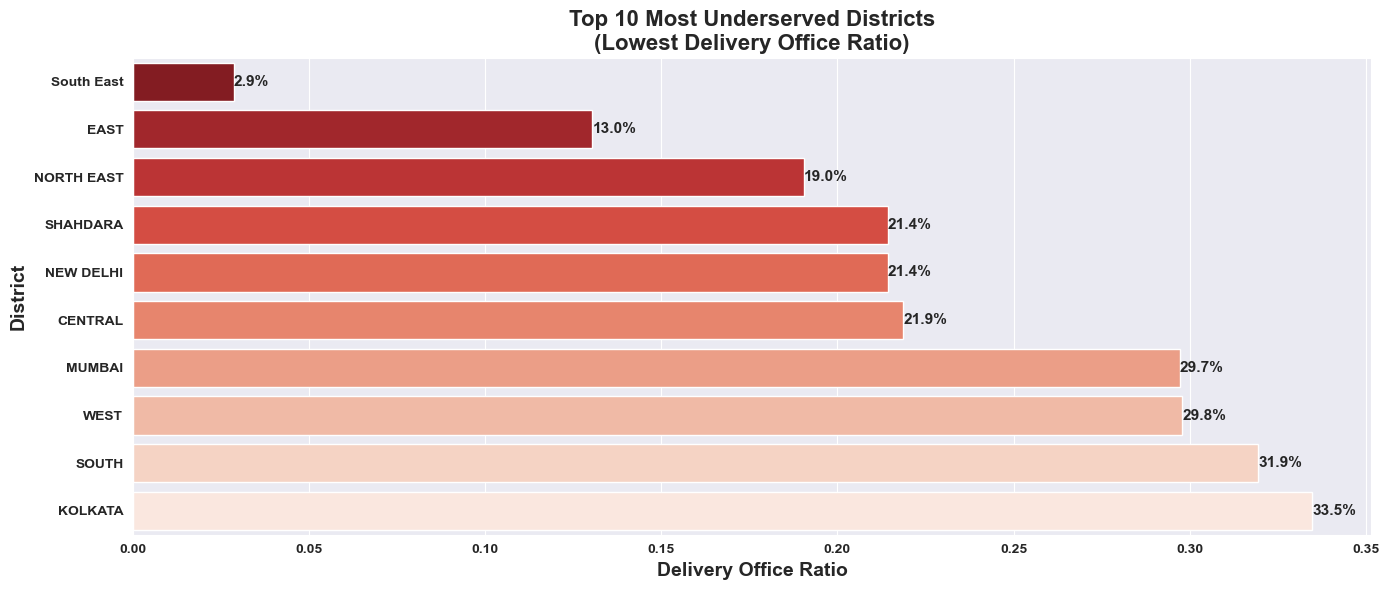

In [36]:

plt.figure(figsize=(14, 6))

ax=sns.barplot(
    data=most_underserved_dist,
    y=most_underserved_dist.index,
    x='delivery_ratio',
    palette='Reds_r'
)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{width*100:.1f}%',
        (width, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=11.1,
        fontweight='semibold'
    )    
plt.xlabel('Delivery Office Ratio', fontsize=14, fontweight='bold')
plt.ylabel('District', fontsize=14, fontweight='bold')
plt.title('Top 10 Most Underserved Districts\n(Lowest Delivery Office Ratio)',
          fontsize=16, fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


plt.tight_layout()
plt.show()


## Insight:
- Major metropolitan districts such as South East Delhi, New Delhi, Mumbai, and Kolkata exhibit lower delivery ratios, reflecting a higher concentration of non-delivery and administrative post offices.

# District-Level Micro Analysis

## Top 20 District Coverage:

In [37]:

top_district_counts = (
    mydf.groupby(['district', 'statename'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
).head(20)


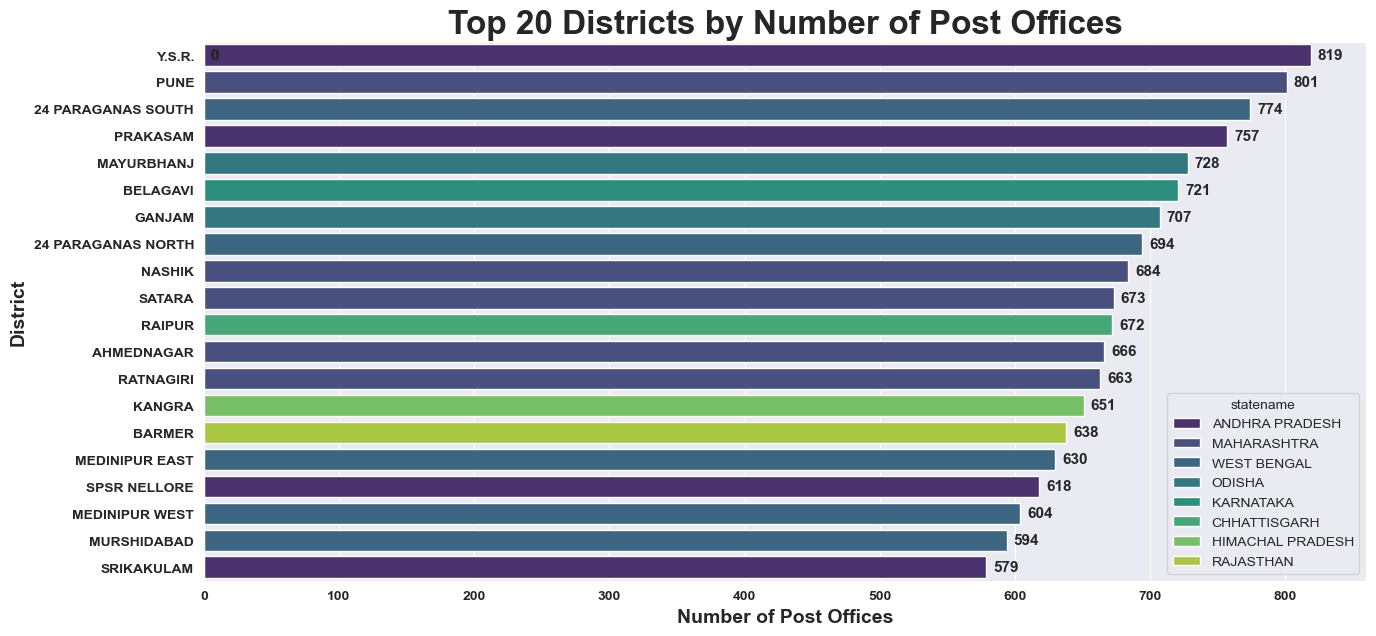

In [38]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=top_district_counts,y='district',x='count',hue='statename',palette='viridis')


plt.title('Top 20 Districts by Number of Post Offices', fontsize=24, fontweight='bold')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
    f'{int(width)}',
    (width, p.get_y() + p.get_height()/2),
    xytext=(5, 0),
    textcoords='offset points',
    ha='left',
    va='center',
    fontsize=11,
    fontweight='semibold'
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Number of Post Offices', fontsize=14, fontweight='bold')
plt.ylabel('District', fontsize=14, fontweight='bold')
plt.show()

## Insight:
- Districts with large geographic area and high rural population—such as Y.S.R., Pune, Prakasam, and the 24 Parganas—show the highest concentration of post offices, reflecting extensive last-mile service requirements.

## 20 Districts with Least Number of Post Offices:

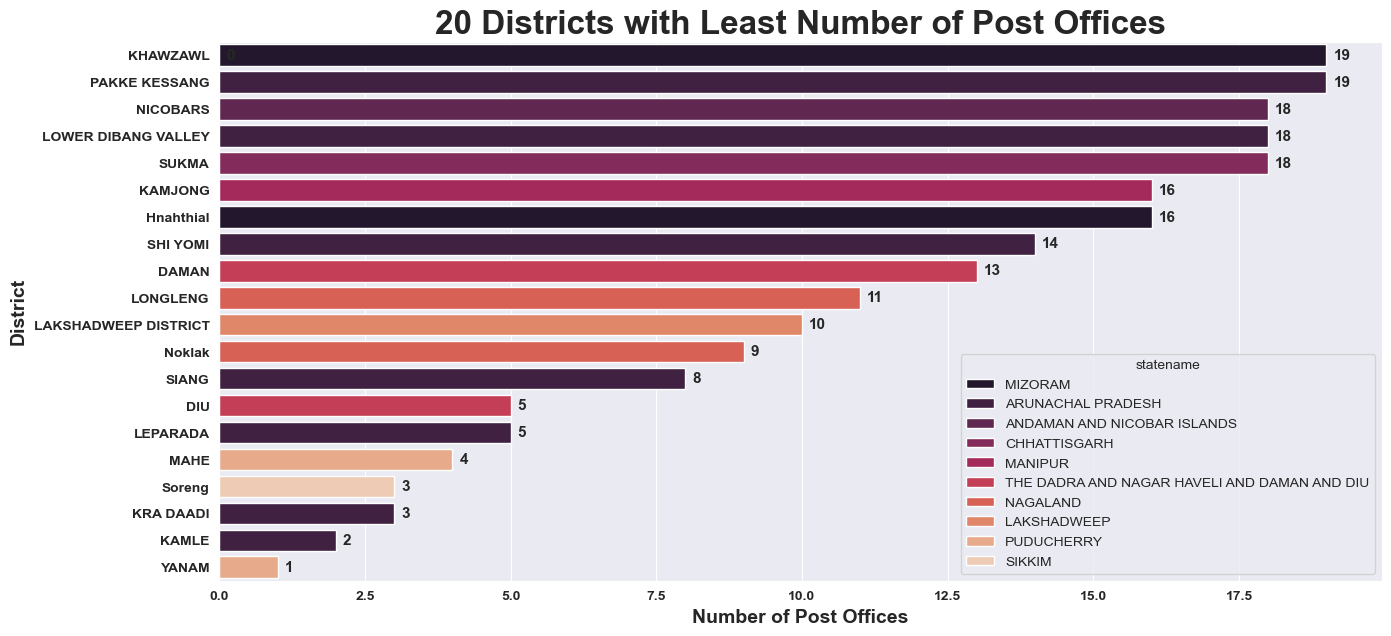

In [39]:
bottom_district_counts= (
    mydf.groupby(['district', 'statename'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
).tail(20)
plt.figure(figsize=(15,7))
ax=sns.barplot(data=bottom_district_counts,y='district',x='count',hue='statename',palette='rocket')

plt.title('20 Districts with Least Number of Post Offices', fontsize=24, fontweight='bold')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
    f'{int(width)}',
    (width, p.get_y() + p.get_height()/2),
    xytext=(5, 0),
    textcoords='offset points',
    ha='left',
    va='center',
    fontsize=11,
    fontweight='semibold'
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Number of Post Offices', fontsize=14, fontweight='bold')
plt.ylabel('District', fontsize=14, fontweight='bold')
plt.show()

## Insights:
- Districts with the lowest post office counts are predominantly small, remote, or island regions, where limited population size and geographic isolation reduce the need for dense postal infrastructure.

#  Case Study: District-Level Micro Analysis — Bankura (West Bengal)

To demonstrate how national and state-level postal infrastructure patterns translate at a local scale, a focused district-level case study was conducted for Bankura district in West Bengal. Bankura represents a semi-rural district with mixed geographic and demographic characteristics, making it suitable for micro-level infrastructure analysis.

## Filtering Bankura Data

In [40]:
bankura_df = mydf[
    (mydf['district'].str.upper() == 'BANKURA') &
    (mydf['statename'].str.upper() == 'WEST BENGAL')
]


## Total Post Offices

In [41]:
bankura_df.shape

(494, 11)

## Insights:
- Clearly , there are 494 post offices.

## Office Type Composition (BO / PO / HO)

In [42]:
office_type_bankura=bankura_df['officetype'].value_counts()

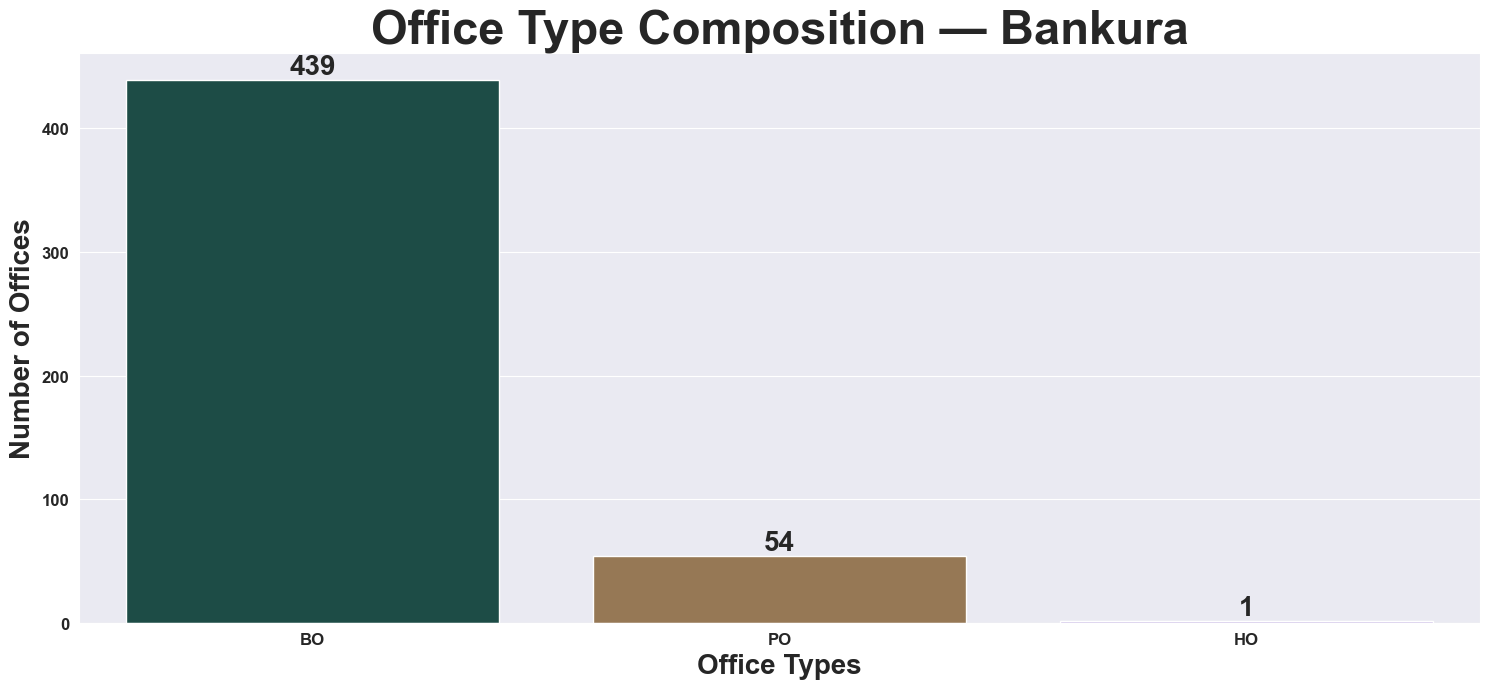

In [43]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=office_type_bankura.index,y=office_type_bankura.values,palette='cubehelix')
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.0f}',
               (p.get_x()+p.get_width()/2.,height),
               ha='center',
               va='bottom',
               fontsize=20,fontweight='semibold'
)
plt.title('Office Type Composition — Bankura', fontsize=34, fontweight='bold')
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.xlabel('Office Types', fontsize=20, fontweight='bold')
plt.ylabel('Number of Offices', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## Insight:
Bankura’s postal network is overwhelmingly dominated by Branch Offices, indicating a strong rural service orientation with minimal administrative centralization.

## Delivery Dominance in Bankura

In [44]:
delivery_bankura = bankura_df['delivery'].value_counts()
delivery_bankura


delivery
Delivery        483
Non Delivery     11
Name: count, dtype: int64

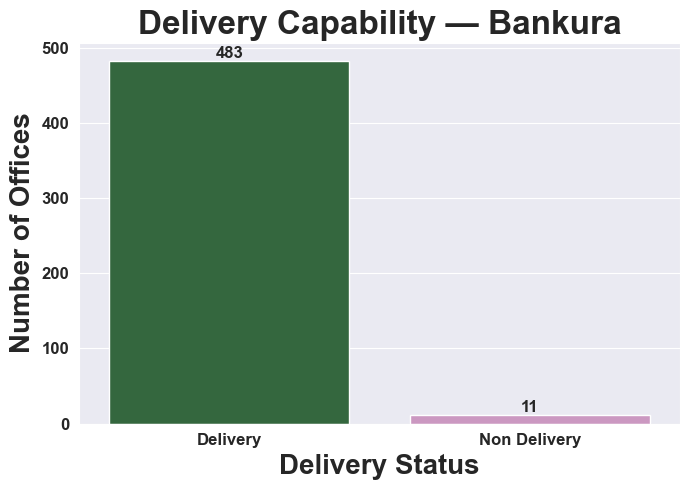

In [45]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=delivery_bankura.index,y=delivery_bankura.values,palette='cubehelix')
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.0f}',
               (p.get_x()+p.get_width()/2.,height),
               ha='center',
               va='bottom',
               fontsize=12,fontweight='semibold'
)
plt.title('Delivery Capability — Bankura', fontsize=24, fontweight='bold')
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.xlabel('Delivery Status', fontsize=20, fontweight='bold')
plt.ylabel('Number of Offices', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## Insight:
- Bankura exhibits near-universal delivery coverage, indicating a strong last-mile postal network that effectively serves local communities.

## Delivery Office Coverage Comparison (West Bengal vs Bankura)

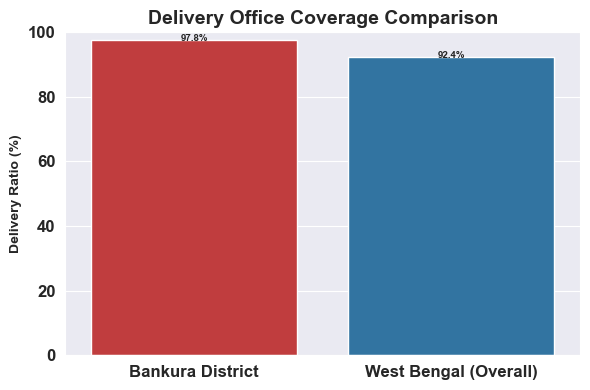

In [46]:
wb_df = mydf[mydf['statename'].str.upper() == 'WEST BENGAL']

bankura_delivery_ratio = (
    (bankura_df['delivery'] == 'Delivery').mean() * 100
)

wb_delivery_ratio = (
    (wb_df['delivery'] == 'Delivery').mean() * 100
)


comparison_df = pd.DataFrame({
    'Region': ['Bankura District', 'West Bengal (Overall)'],
    'Delivery Ratio (%)': [bankura_delivery_ratio, wb_delivery_ratio]
})

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=comparison_df,
    x='Region',
    y='Delivery Ratio (%)',
    palette=['#d62728', '#1f77b4']
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height-1),
        ha='center',
        va='bottom',
        fontsize=7,
        fontweight='bold'
    )

plt.title('Delivery Office Coverage Comparison',
          fontsize=14, fontweight='bold')
plt.ylabel('Delivery Ratio (%)', fontweight='bold')
plt.xlabel('')
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



## Insight:
- Bankura outperforms the state average in delivery coverage, indicating stronger last-mile service penetration compared to West Bengal as a whole.

## Geographic Spread — Bankura

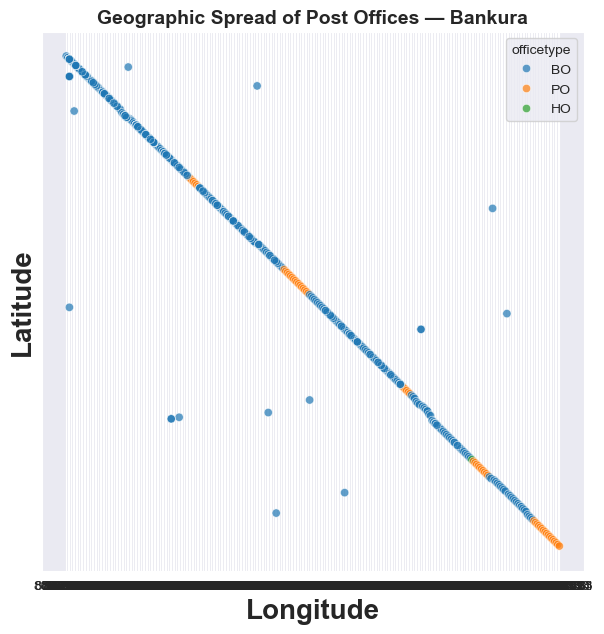

In [47]:
bankura_geo = bankura_df.dropna(subset=['latitude', 'longitude'])
plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=bankura_geo,
    x='longitude',
    y='latitude',
    alpha=0.7,
    hue='officetype'
)
plt.title('Geographic Spread of Post Offices — Bankura', fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=20, fontweight='bold')
plt.ylabel('Latitude',fontsize=20, fontweight='bold')
plt.yticks([]) 
plt.show()


## Insight:
- Post offices in Bankura are evenly distributed across the district, reflecting systematic geographic coverage, with a few outliers likely representing remote or sparsely populated areas.

## West Bengal District w.r.t Number of Post Offices (Highlighting Bankura)

In [48]:
wb_district_counts = (
    wb_df.groupby('district')
         .size()
         .sort_values(ascending=False)
)

bankura_rank = wb_district_counts.index.get_loc('BANKURA') + 1
bankura_rank

7

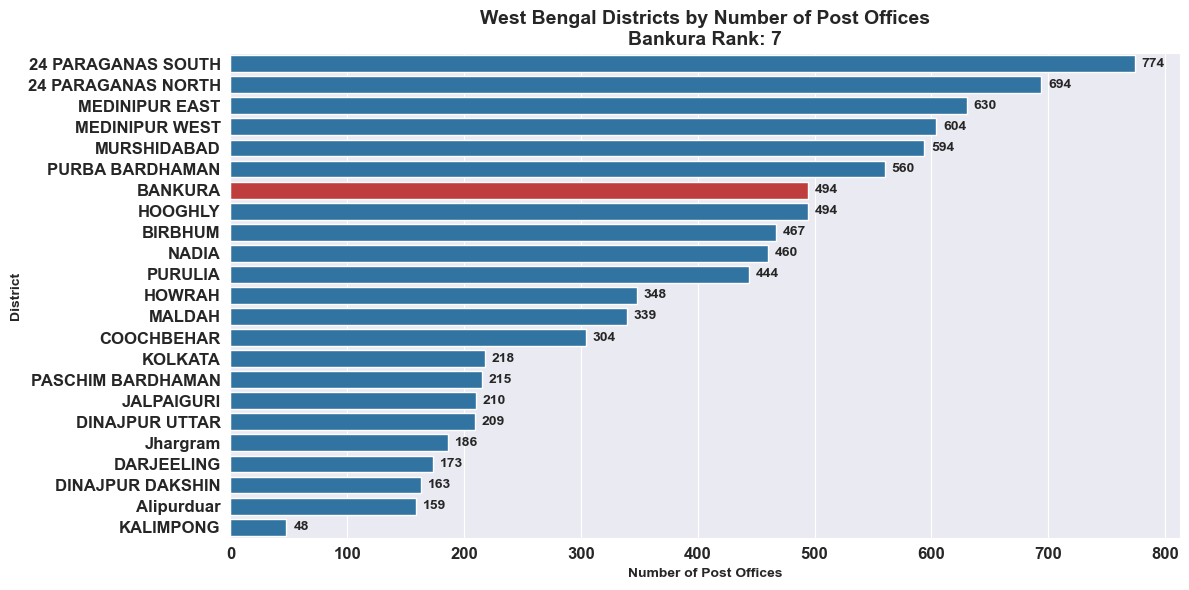

In [49]:


wb_top = (
    wb_district_counts
    .reset_index(name='count')
)

wb_top['highlight'] = wb_top['district'].eq('BANKURA')
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=wb_top,
    y='district',
    x='count',
    palette=['#d62728' if h else '#1f77b4' for h in wb_top['highlight']]
)


for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height()/2),
        xytext=(5, 0),
        textcoords='offset points',
        va='center',
        ha='left',
        fontweight='bold'
    )

plt.title(
    f'West Bengal Districts by Number of Post Offices\n'
    f'Bankura Rank: {bankura_rank}',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Number of Post Offices', fontweight='bold')
plt.ylabel('District', fontweight='bold')
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.tight_layout()
plt.show()



## Insight:
- Bankura ranks 7th in West Bengal in terms of number of post offices, indicating a moderate concentration of postal infrastructure relative to other districts in the state.

## Total Post Offices per Division — Bankura

In [50]:
bankura_region = bankura_df.groupby('regionname').agg(
    total_offices=('officename', 'count'),
    BO_count=('officetype', lambda x: (x=='BO').sum()),
    PO_count=('officetype', lambda x: (x=='PO').sum()),
    HO_count=('officetype', lambda x: (x=='HO').sum()),
    delivery_count=('delivery', lambda x: (x=='Delivery').sum())
).reset_index()

bankura_region


,regionname,total_offices,BO_count,PO_count,HO_count,delivery_count
0,South Bengal Region,494,439,54,1,483


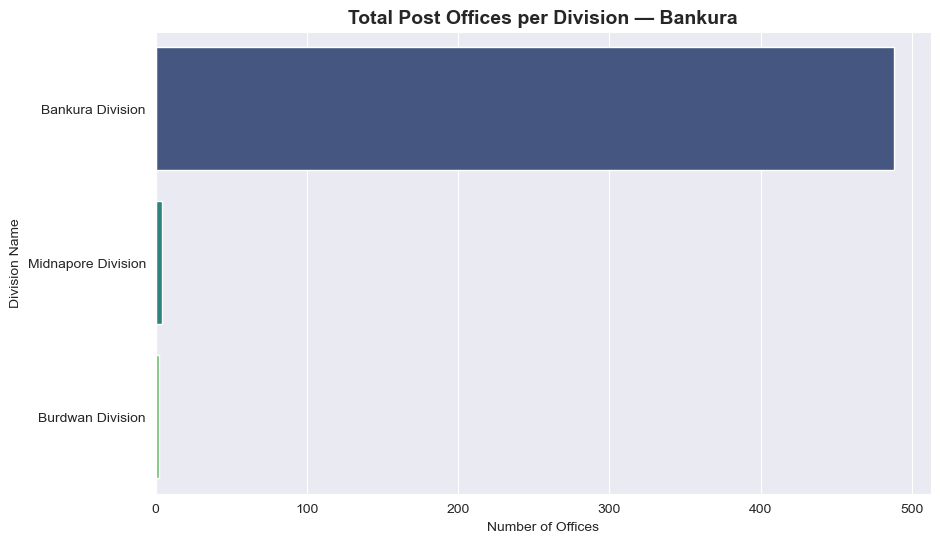

In [51]:
division_counts = bankura_df.groupby('divisionname').agg(
    total_offices=('officename', 'count')
).sort_values('total_offices', ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_offices',
    y='divisionname',
    data=division_counts,
    palette='viridis'
)
plt.title('Total Post Offices per Division — Bankura', fontsize=14, fontweight='bold')
plt.xlabel('Number of Offices')
plt.ylabel('Division Name')
plt.show()



## Insights:
- Bankura Division dominates district-level postal coverage, while neighboring divisions such as Midnapore and Burdwan have minimal presence, reflecting centralized service planning.

## Office Type Composition by Division — Bankura

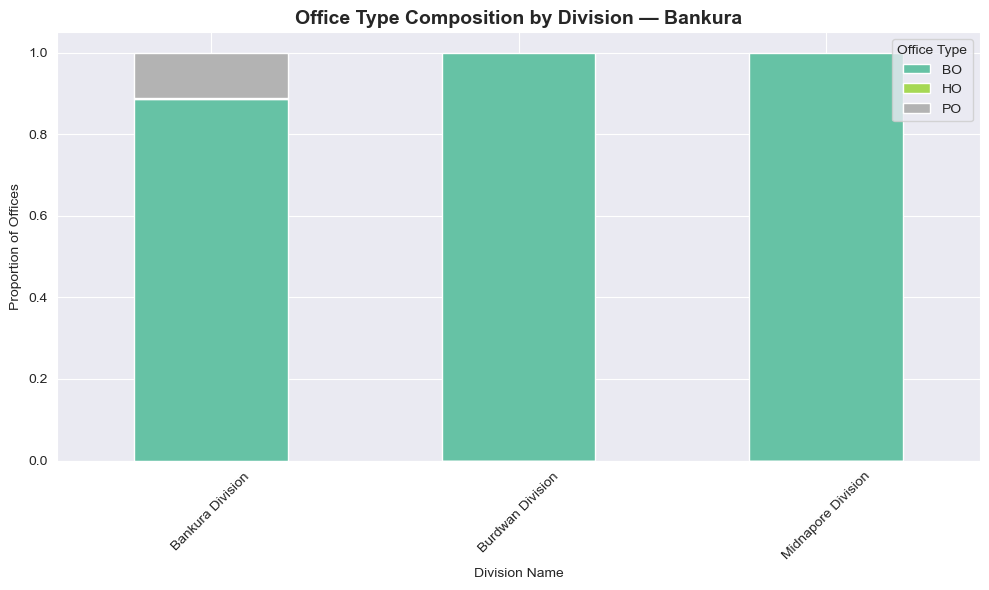

In [52]:
division_office_type = bankura_df.groupby(['divisionname', 'officetype']).size().reset_index(name='count')

pivot_division_office = division_office_type.pivot(
    index='divisionname',
    columns='officetype',
    values='count'
).fillna(0)


pivot_division_office_norm = pivot_division_office.div(pivot_division_office.sum(axis=1), axis=0)
pivot_division_office_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'
)
plt.title('Office Type Composition by Division — Bankura', fontsize=14, fontweight='bold')
plt.xlabel('Division Name')
plt.ylabel('Proportion of Offices')
plt.xticks(rotation=45)
plt.legend(title='Office Type')
plt.tight_layout()
plt.show()


## Insight:
- Bankura Division has a mix of office types with a dominant share of Branch Offices and a small presence of Post and Head Offices, while Burdwan and Midnapore Divisions consist solely of Branch Offices, highlighting centralization of administrative functions in Bankura Division.

## Delivery Coverage by Division — Bankura

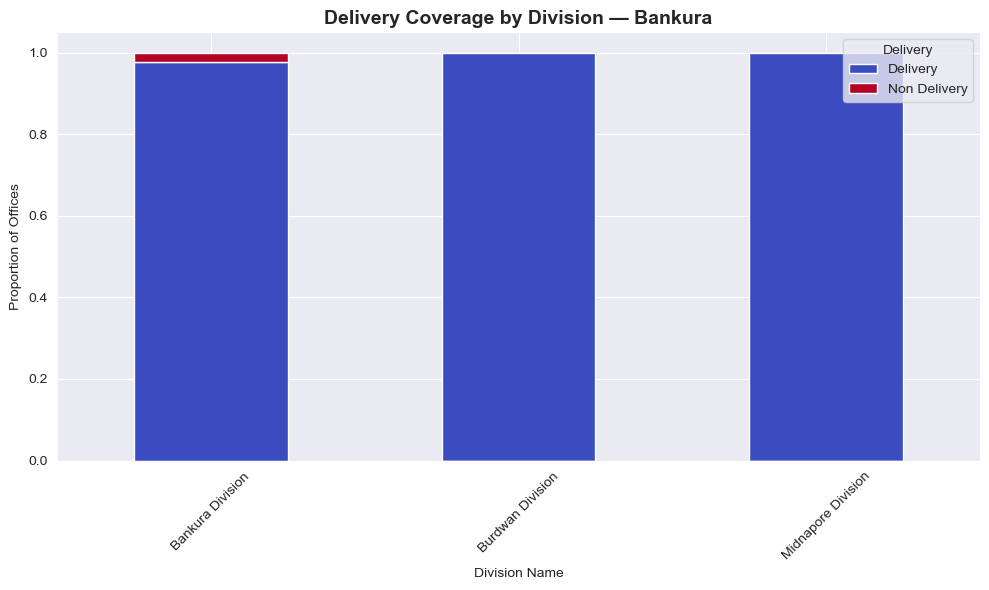

In [53]:
division_delivery = bankura_df.groupby(['divisionname', 'delivery']).size().reset_index(name='count')

pivot_division_delivery = division_delivery.pivot(
    index='divisionname',
    columns='delivery',
    values='count'
).fillna(0)


pivot_division_delivery_norm = pivot_division_delivery.div(pivot_division_delivery.sum(axis=1), axis=0)
pivot_division_delivery_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm'
)
plt.title('Delivery Coverage by Division — Bankura', fontsize=14, fontweight='bold')
plt.xlabel('Division Name')
plt.ylabel('Proportion of Offices')
plt.xticks(rotation=45)
plt.legend(title='Delivery')
plt.tight_layout()
plt.show()


## Insights:
- Delivery services dominate across all divisions, with Bankura Division showing slightly lower but still very high delivery coverage compared to Burdwan and Midnapore Divisions, which are fully delivery-oriented.

# Key Findings:
### 1. State-Level Distribution

- Uttar Pradesh has the highest number of post offices, followed by Maharashtra and Tamil Nadu.

- Smaller states and Union Territories like Lakshadweep, Chandigarh, and Puducherry have very few offices.

- The top ten states together account for more than half of all post offices, showing concentration in populous or large states.

### 2. Circle–Region–Division Hierarchy

- Circles vary in their administrative complexity; some, like Uttar Pradesh Circle, manage large numbers of regions and divisions, while others like APS Circle are minimal.

- Large circles show decentralized regional hierarchies, whereas smaller circles rely on centralized reporting.

### 3. Office Type & Service Coverage

- Branch Offices (BOs) overwhelmingly dominate the network, indicating strong rural coverage.

- Post Offices (POs) and Head Offices (HOs) are concentrated in urbanized or administrative hubs.

- Most post offices provide delivery services, with urban areas like Delhi and Chandigarh having a relatively higher proportion of non-delivery offices due to administrative functions.

### 4. Geographic Patterns

- Offices are generally well distributed geographically, with coastal, urban, and remote areas reflecting spatial planning.

- Larger states show wider latitude/longitude spread, while compact states show tighter clustering.

### 5. District-Level Insights

- Districts like Y.S.R., Pune, and 24 Parganas South have the highest number of offices, reflecting large populations or geographic areas.

- Remote districts like Lakshadweep, Arunachal Pradesh districts, and Mizoram districts have minimal post office presence due to low population density or geographic isolation.

- Urban districts often exhibit lower delivery ratios, reflecting a higher presence of non-delivery offices for administrative and sorting purposes.

### 6. Bankura Case Study

- Bankura district ranks 7th in West Bengal by number of post offices, with 488 offices concentrated in Bankura Division.

- Office type composition is overwhelmingly Branch Office-dominated, with only one HO and a few POs, reflecting centralized administration.

- Delivery coverage is extremely high (97.8%), surpassing the West Bengal average (92.4%).

- Post offices are evenly geographically distributed with few outliers in remote areas.

# Overall Conclusion

- India Post’s infrastructure is heavily skewed toward populous and rural regions, with Branch Offices forming the backbone of the network.

- Delivery services are widely implemented, though urban districts have a higher proportion of non-delivery offices due to administrative and sorting needs.

- Administrative structures vary across circles and divisions, showing both centralized and decentralized models depending on the region.

- Micro-analysis, such as the Bankura case study, demonstrates how local familiarity can highlight strong last-mile service penetration and effective geographic coverage.

- These insights can inform policy planning, targeted expansion of services, and understanding of regional postal infrastructure imbalances.